## Get husky image

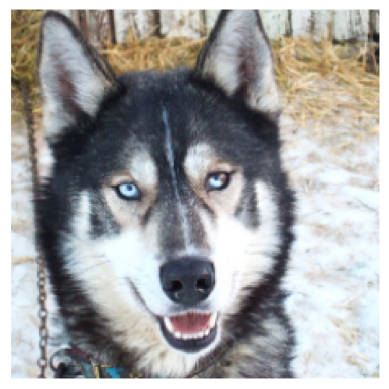

In [86]:
import cv2
import matplotlib.pyplot as plt

husky_image = cv2.imread('husky.png')
husky_image = cv2.cvtColor(husky_image, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(husky_image)
plt.show()

## Define grid functions

In [125]:
from dataclasses import dataclass

@dataclass
class Grid:
    grid: np.array
    number_of_regions: int
    h: int
    w: int

class SubImage:
    def __init__(self, grid: Grid):
        self.selected = np.random.random_sample(size=grid.number_of_regions) < 0.5
        self.grid = grid

def get_sides(number_of_regions: int):
    if number_of_regions <= 3:
        raise ValueError(f"Provide number greater than 3")
    for i in range(int(number_of_regions ** 0.5 + 1), 1, -1):
        if number_of_regions % i == 0:
            return i, number_of_regions // i
    raise ValueError(f"{number_of_regions} is prime, provide not prime number")

def calculate_regions(image, number_of_regions):
    h, w = get_sides(number_of_regions)

    grid = []
    parts = np.array_split(husky_image, h)
    for part in parts:
        grid.append(np.array_split(part, w, axis=1))
    return Grid(grid, number_of_regions, h, w)

def visualize_grid(grid: Grid, condition = lambda i, j: True):
    f, axs = plt.subplots(grid.h, grid.w)
    for i, row in enumerate(grid.grid):
        for j, element in enumerate(row):
            if condition(i, j):
                axs[i, j].imshow(element)
            axs[i, j].axis('off')

    plt.subplots_adjust(wspace=-(grid.number_of_regions / 40), hspace=0.1)
    plt.show()

def visualize_sub_image(sub_image: SubImage):
    grid = sub_image.grid
    visualize_grid(sub_image.grid, lambda i, j: sub_image.selected[i * h + j])

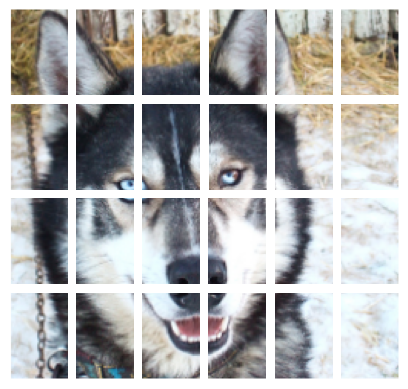

In [126]:
import numpy as np

grid = calculate_regions(husky_image, number_of_regions=24)
visualize_grid(grid)

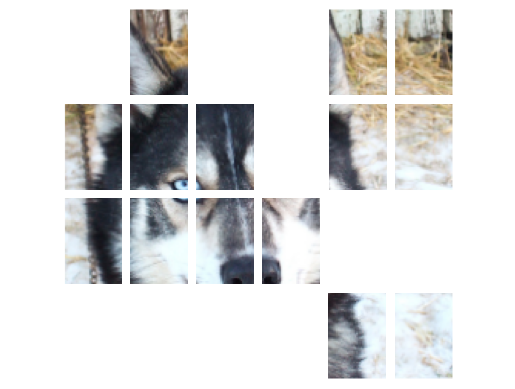

In [129]:
visualize_sub_image(SubImage(grid))